# Decision Tree Classifier

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [5]:
df = pd.read_csv("bank-full.csv", sep=',')  # try comma separator

## Exploratory Data Analysis

In [6]:
print(df.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


In [7]:
df['y'].value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['y'] = le.fit_transform(df['y'])  # yes = 1, no = 0

# Confirm it worked
df['y'].value_counts()

y
0    39922
1     5289
Name: count, dtype: int64

In [9]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
print(cat_cols)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


## Data Preprocessing

In [10]:
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [11]:
df_encoded.head()
df_encoded.shape

(45211, 43)

In [12]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

 ## Model Training

In [13]:
from sklearn.tree import DecisionTreeClassifier

# Create the model
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

## Evaluation

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make predictions on test data
y_pred = dt_model.predict(X_test)

# Accuracy
print("✅ Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
print("\n✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification Report
print("\n✅ Classification Report:\n", classification_report(y_test, y_pred))

✅ Accuracy: 0.8973791883224593

✅ Confusion Matrix:
 [[7753  199]
 [ 729  362]]

✅ Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      7952
           1       0.65      0.33      0.44      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.65      0.69      9043
weighted avg       0.88      0.90      0.88      9043



## Visualization

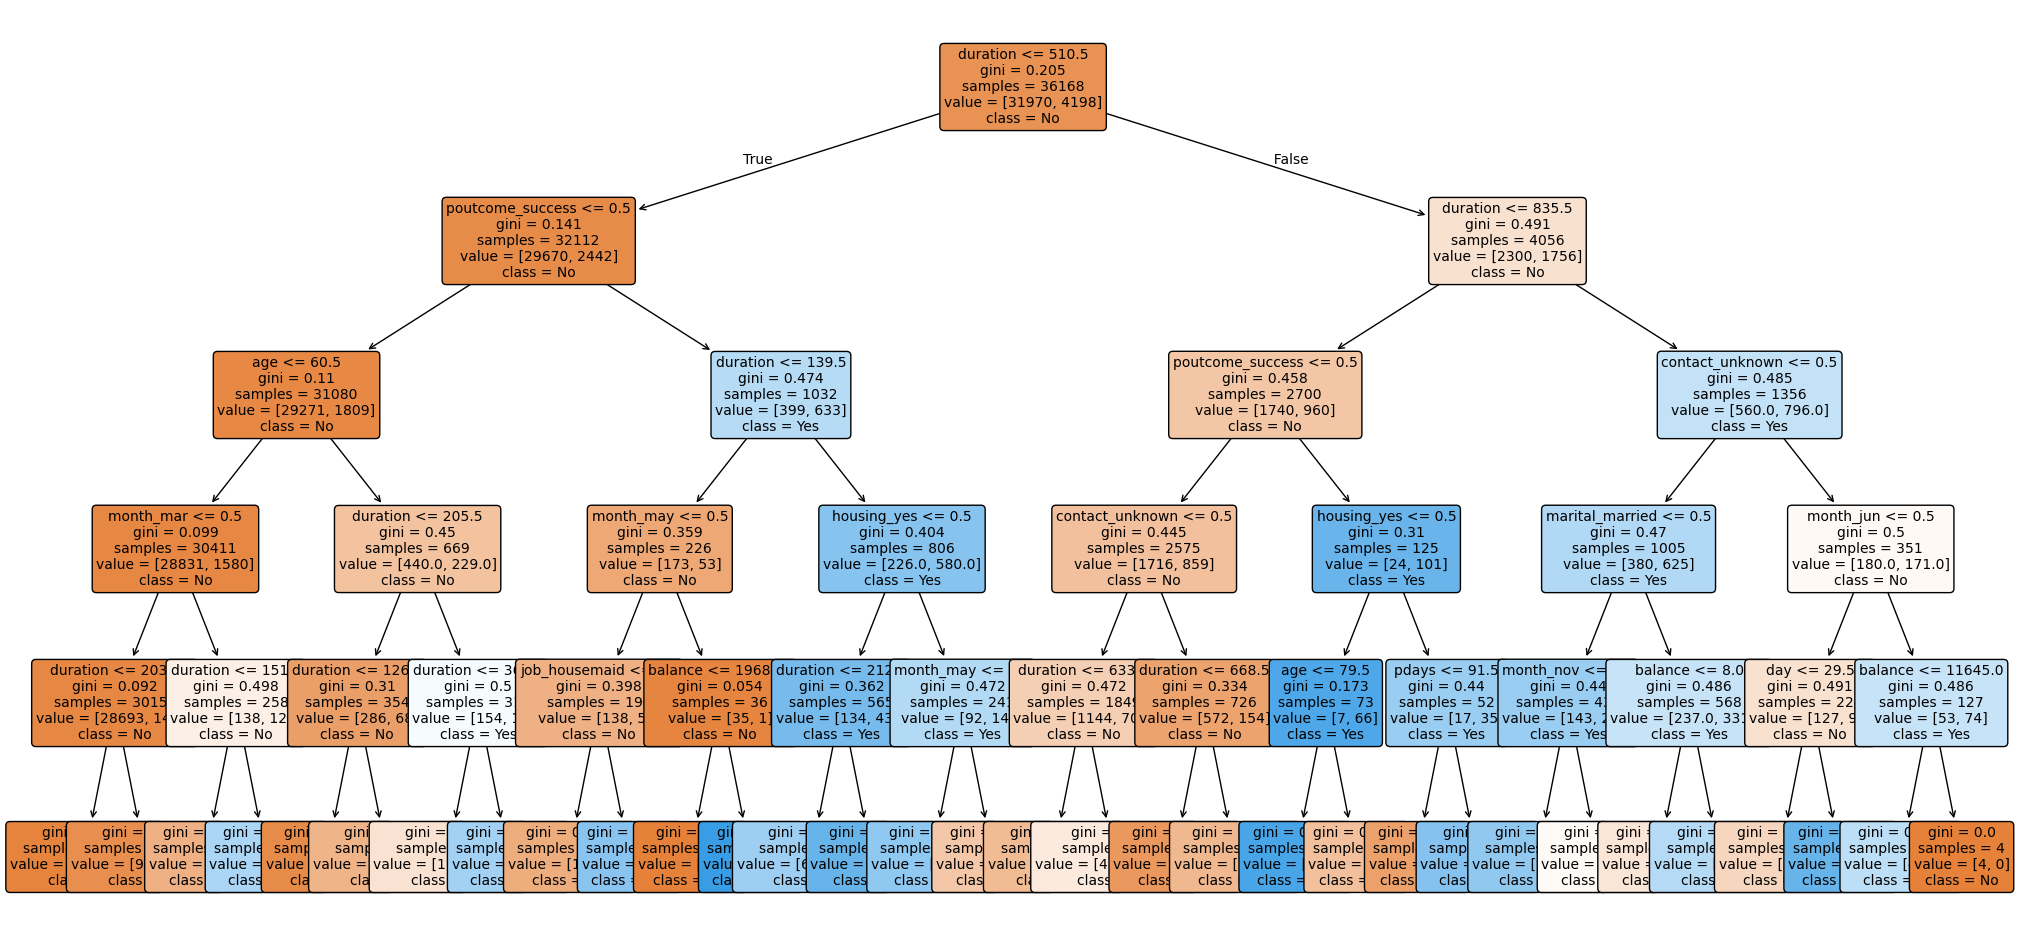

In [15]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 12))
plot_tree(dt_model, 
          feature_names=X.columns, 
          class_names=['No', 'Yes'], 
          filled=True, 
          rounded=True,
          fontsize=10)
plt.show()